In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt

In [7]:
#设置参数
n_step = 3
colName = 'AirPassengers'

In [8]:
#导入数据并构建数据集
df = pd.read_csv('../Data/AirPassengers.csv', usecols= [colName])
dataset = df.values
dataset = dataset.astype('float32')

size = len(dataset)

data = pd.DataFrame(dataset[n_step:],columns=['pre'])

for i in range(n_step):
    data['x' + str(i)] = dataset[i : size - n_step + i]


train_size = int(size * 0.67)
test_size = size - train_size

train_data = data[0:train_size]
test_data = data[train_size:]

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)


train_x = train_data[:,1:]
train_y = train_data[:,0]

test_x = test_data[:,1:]
test_y = data['pre'][train_size:]

In [9]:
clf = svm.SVR(kernel='linear')
clf.fit(train_x,train_y)

train_pre_data = clf.predict(train_x)
train_pre_data = np.column_stack((train_pre_data,train_x))
train_pre_data = scaler.inverse_transform(train_pre_data)
train_pre_data = train_pre_data[:,0]

pre_data = clf.predict(test_x)
pre_data = np.column_stack((pre_data,test_x))
pre_data = scaler.inverse_transform(pre_data)
pre_data = pre_data[:,0]

mse = mean_squared_error(test_y,pre_data)
mae = mean_absolute_error(test_y,pre_data)
print('mse is : ',mse,' rmse is : ',np.sqrt(mse))
print('mae is : ',mae,' rmae is : ',np.sqrt(mse))

mse is :  2499.3730118304134  rmse is :  49.99372972514067
mae is :  40.515477759998575  rmae is :  49.99372972514067


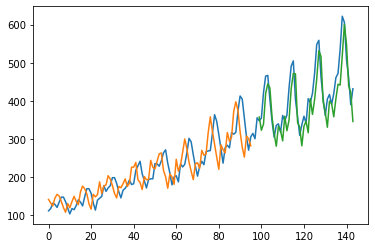

In [10]:
testPredictPlot = np.full_like(dataset ,np.nan)
pre_data = pre_data.reshape(len(pre_data),1)
testPredictPlot[train_size + n_step:size,:] = pre_data

plt.plot(dataset)
plt.plot(train_pre_data)
plt.plot(testPredictPlot)
plt.show()